In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('weather.csv', index_col='DATE')

In [3]:
data.head()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [4]:
weather = data[['PRCP', 'TMAX', 'TMIN', 'TAVG', 'SNOW', 'SNWD']]

In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17197 entries, 1960-01-01 to 2022-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRCP    16916 non-null  float64
 1   TMAX    17186 non-null  float64
 2   TMIN    17183 non-null  float64
 3   TAVG    2037 non-null   float64
 4   SNOW    11380 non-null  float64
 5   SNWD    11504 non-null  float64
dtypes: float64(6)
memory usage: 940.5+ KB


In [6]:
weather.isnull().sum()/weather.shape[0]

PRCP    0.016340
TMAX    0.000640
TMIN    0.000814
TAVG    0.881549
SNOW    0.338257
SNWD    0.331046
dtype: float64

In [7]:
weather = weather.rename(columns={'PRCP':'preciptation', 'TMAX':'t_max', 'TMIN':'t_min', 'TAVG':'t_avg', 'SNOW':'snow', 'SNWD': 'snow_wd'})

In [8]:
weather['snow'].value_counts()

0.0     11379
25.0        1
Name: snow, dtype: int64

In [9]:
weather['snow_wd'].value_counts()

0.0    11504
Name: snow_wd, dtype: int64

these two columns add no usefull information to our predictions, since it has only one value.

In [10]:
weather = weather.drop(['snow', 'snow_wd'], axis=1)

In [11]:
weather

,preciptation,t_max,t_min,t_avg
DATE,,,,
1960-01-01,0.0,9.4,-1.1,NaN
1960-01-02,0.0,9.4,-1.7,NaN
1960-01-03,0.0,12.2,1.7,NaN
1960-01-04,0.0,12.2,2.2,NaN
1960-01-05,0.0,12.8,0.6,NaN
...,...,...,...,...
2022-12-27,45.0,14.4,9.4,NaN
2022-12-28,0.0,13.9,4.4,NaN
2022-12-29,10.7,13.3,9.4,NaN


In [12]:
weather['preciptation'].value_counts()

0.0     13963
0.3       442
0.5       202
0.8       123
1.0       105
        ...  
39.6        1
51.1        1
40.9        1
31.7        1
29.7        1
Name: preciptation, Length: 181, dtype: int64

In [13]:
weather['preciptation'].isnull().sum()

281

In [14]:
weather['preciptation'] = weather['preciptation'].fillna(0)

In [15]:
weather['preciptation'].isnull().sum()

0

In [16]:
weather['t_max'].mean()

18.728889794018254

In [17]:
weather['t_max'].isnull().sum()

11

In [18]:
weather['t_max'] = weather['t_max'].fillna(weather['t_max'].mean())

In [19]:
weather['t_max'].isnull().sum()

0

In [20]:
weather['t_min'].isnull().sum()

14

In [21]:
weather['t_min'].mean()

10.22948262817901

In [22]:
weather['t_min'] = weather['t_min'].fillna(weather['t_min'].mean())

In [23]:
weather['t_min'].isnull().sum()

0

In [24]:
weather[weather['t_min'] != 0].shape

(17152, 4)

In [25]:
weather = weather[weather['t_min'] != 0]

In [26]:
weather

,preciptation,t_max,t_min,t_avg
DATE,,,,
1960-01-01,0.0,9.4,-1.1,NaN
1960-01-02,0.0,9.4,-1.7,NaN
1960-01-03,0.0,12.2,1.7,NaN
1960-01-04,0.0,12.2,2.2,NaN
1960-01-05,0.0,12.8,0.6,NaN
...,...,...,...,...
2022-12-27,45.0,14.4,9.4,NaN
2022-12-28,0.0,13.9,4.4,NaN
2022-12-29,10.7,13.3,9.4,NaN


In [27]:
weather['t_avg'] = weather[['t_max', 't_min']].mean(axis=1)

<ipython-input-27-7bc02147fe8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['t_avg'] = weather[['t_max', 't_min']].mean(axis=1)


In [28]:
weather.isnull().sum()

preciptation    0
t_max           0
t_min           0
t_avg           0
dtype: int64

In [29]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17152 entries, 1960-01-01 to 2022-12-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   preciptation  17152 non-null  float64
 1   t_max         17152 non-null  float64
 2   t_min         17152 non-null  float64
 3   t_avg         17152 non-null  float64
dtypes: float64(4)
memory usage: 670.0+ KB


In [30]:
weather.index = pd.to_datetime(weather.index)

In [31]:
import matplotlib.pyplot as plt

[]

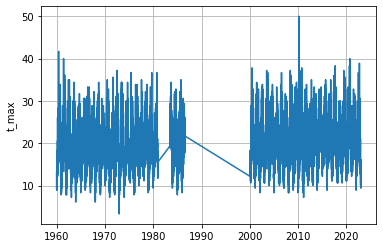

In [58]:
# weather['t_max'].plot()
plt.plot(weather.index, weather['t_max'])
plt.ylabel('t_max')
plt.grid()
plt.plot()

[]

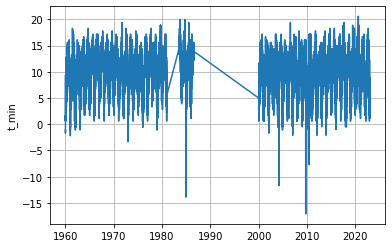

In [61]:
# weather['t_min'].plot()
plt.plot(weather.index, weather['t_min'])
plt.grid()
plt.ylabel('t_min')
plt.plot()

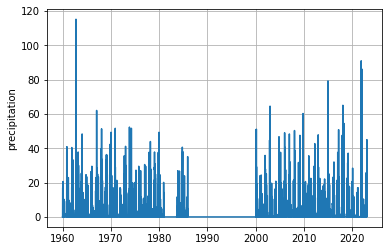

In [62]:
# weather['preciptation'].plot()
plt.plot(weather.index, weather['preciptation'])
plt.grid()
plt.ylabel('precipitation')
plt.show()

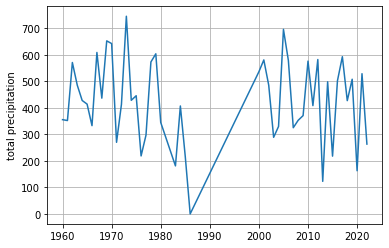

In [68]:
preciptation_by_year = weather.groupby(weather.index.year).sum()
# preciptation_by_year['preciptation'].plot()
# preciptation_by_year
plt.plot(preciptation_by_year.index, preciptation_by_year['preciptation'])
plt.grid()
plt.ylabel('total precipitation')
plt.show()

Training an Initial Model

In [36]:
weather['target'] = weather.shift(-1)['t_max']

<ipython-input-36-c2ab0bc612c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['target'] = weather.shift(-1)['t_max']


In [37]:
weather = weather.iloc[:-1, :]
weather

,preciptation,t_max,t_min,t_avg,target
DATE,,,,,
1960-01-01,0.0,9.4,-1.1,4.15,9.4
1960-01-02,0.0,9.4,-1.7,3.85,12.2
1960-01-03,0.0,12.2,1.7,6.95,12.2
1960-01-04,0.0,12.2,2.2,7.20,12.8
1960-01-05,0.0,12.8,0.6,6.70,11.7
...,...,...,...,...,...
2022-12-26,5.6,12.2,6.7,9.45,14.4
2022-12-27,45.0,14.4,9.4,11.90,13.9
2022-12-28,0.0,13.9,4.4,9.15,13.3


In [38]:
target = 'target'
features = [c for c in weather.columns if c != 'target']

In [39]:
weather.corr()['target'].sort_values(ascending=False)

target          1.000000
t_max           0.820655
t_avg           0.797474
t_min           0.593167
preciptation   -0.207877
Name: target, dtype: float64

Splitting the dataframe into train and test sets, using 75% of our dataframe for the train set.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(weather[features], weather[target], shuffle=False)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [43]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_predictions = lr.predict(x_test)
mse = mean_squared_error(y_test, lr_predictions)
rmse = np.sqrt(mse)
rmse

2.6287146217916826

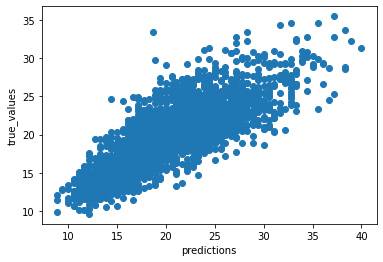

In [44]:
plt.scatter(y_test, lr_predictions)
plt.xlabel('predictions')
plt.ylabel('true_values')
plt.show()

In [45]:
combined = pd.concat([y_test, pd.Series(lr_predictions, index=y_test.index)], axis=1)
combined.columns = ['actual', 'predictions']
combined

,actual,predictions
DATE,,
2011-03-23,11.1,14.669491
2011-03-24,13.9,11.871656
2011-03-25,13.3,14.870663
2011-03-26,15.0,14.042522
2011-03-27,16.7,15.108614
...,...,...
2022-12-26,14.4,13.097242
2022-12-27,13.9,13.419491
2022-12-28,13.3,14.135312


<AxesSubplot:xlabel='DATE'>

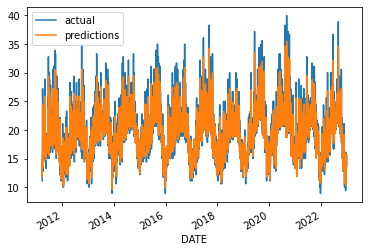

In [46]:
combined.plot()

DATE
2011       AxesSubplot(0.125,0.2;0.775x0.68)
2012       AxesSubplot(0.125,0.2;0.775x0.68)
2013       AxesSubplot(0.125,0.2;0.775x0.68)
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015       AxesSubplot(0.125,0.2;0.775x0.68)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
2019    AxesSubplot(0.125,0.125;0.775x0.755)
2020    AxesSubplot(0.125,0.125;0.775x0.755)
2021    AxesSubplot(0.125,0.125;0.775x0.755)
2022       AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

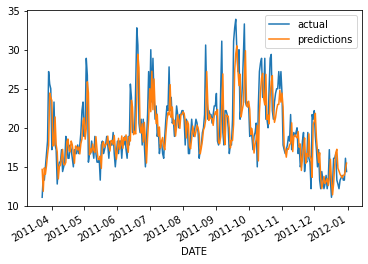

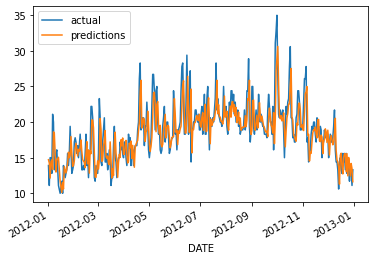

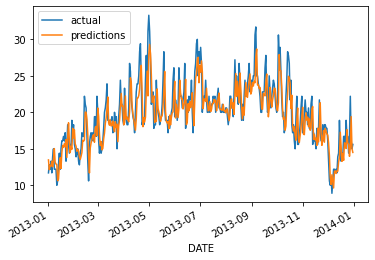

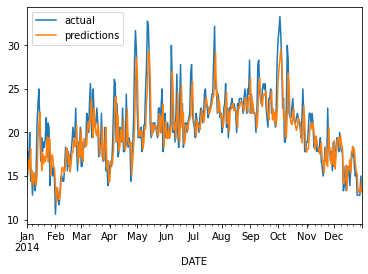

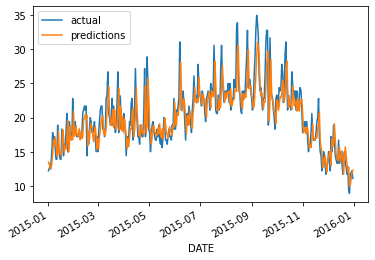

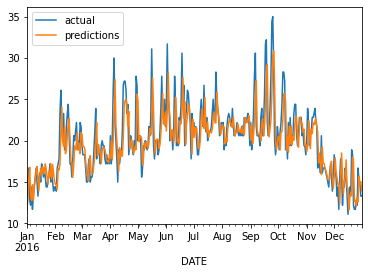

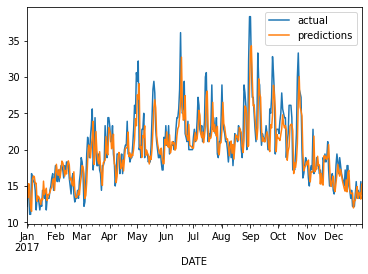

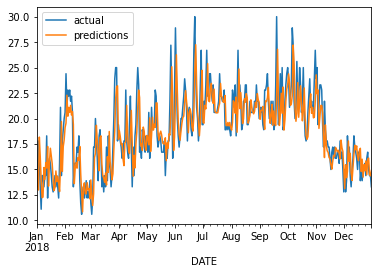

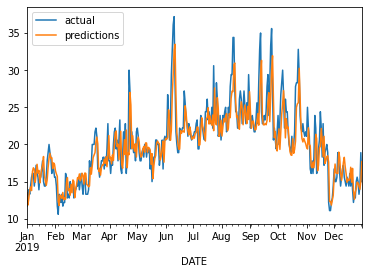

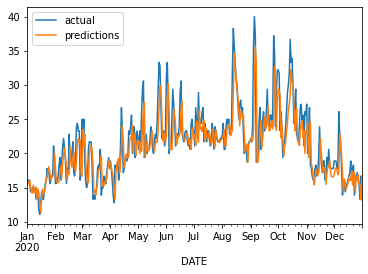

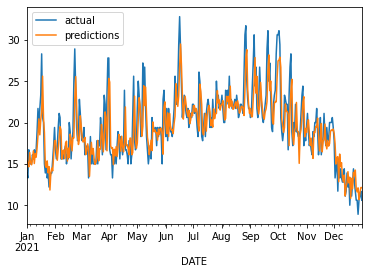

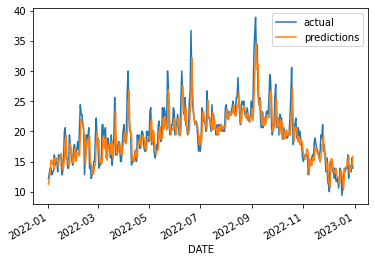

In [47]:
combined_by_year = combined.groupby(combined.index.year)
combined_by_year.plot()

Building a function to split the data, train our model, make predictions and compare them with the actual values.

In [48]:
def weather_prediction_lr(df):
    #Splitting df into train and test sets
    target = 'target'
    features = [c for c in df.columns if c != 'target']
    x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], shuffle=False)
    #Instantianting the model
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    lr_predictions = lr.predict(x_test)
    #Calculaitng the MSE and RMSE
    mse = mean_squared_error(y_test, lr_predictions)
    rmse = np.sqrt(mse)
    #Dataframe with the actual values and the predicted ones
    combined = pd.concat([y_test, pd.Series(lr_predictions, index=y_test.index)], axis=1)
    combined.columns = ['actual', 'predictions']
    return rmse, combined

Trying to improve the models accuracy by adding columns that might help with the predictions.

In [49]:
# weather.head()
weather['avg_30'] = weather['t_max'].rolling(30).mean()
weather['avg_60'] = weather['t_max'].rolling(60).mean()
weather['avg_90'] = weather['t_max'].rolling(90).mean()

# weather.iloc[89:, :]
weather_adjusted = weather.iloc[89:, :].copy()
weather_adjusted

<ipython-input-49-a16539344af6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['avg_30'] = weather['t_max'].rolling(30).mean()
<ipython-input-49-a16539344af6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['avg_60'] = weather['t_max'].rolling(60).mean()
<ipython-input-49-a16539344af6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,preciptation,t_max,t_min,t_avg,target,avg_30,avg_60,avg_90
DATE,,,,,,,,
1960-03-30,3.3,16.1,10.0,13.05,16.1,17.353333,16.460000,15.275556
1960-03-31,0.0,16.1,5.0,10.55,20.6,17.463333,16.478333,15.350000
1960-04-01,0.0,20.6,11.1,15.85,25.6,17.670000,16.543333,15.474444
1960-04-02,0.0,25.6,8.9,17.25,27.2,17.966667,16.720000,15.623333
1960-04-03,0.0,27.2,11.7,19.45,28.3,18.316667,16.923333,15.790000
...,...,...,...,...,...,...,...,...
2022-12-26,5.6,12.2,6.7,9.45,14.4,13.296667,15.086667,17.167309
2022-12-27,45.0,14.4,9.4,11.90,13.9,13.220000,14.983333,17.098420
2022-12-28,0.0,13.9,4.4,9.15,13.3,13.090000,14.910000,17.018420


Making new predictions with the new df weather_adjusted

In [50]:
weather_predicted = weather_prediction_lr(weather_adjusted)

In [51]:
weather_predicted[0]

2.557337203538193

Using the Random Forest algorithm for the model's prediction

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
def weather_prediction_rf(df):
    #Splitting df into train and test sets
    target = 'target'
    features = [c for c in df.columns if c != 'target']
    x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], shuffle=False)
    #Instantianting the model
    rf = RandomForestRegressor()
    rf.fit(x_train, y_train)
    rf_predictions = rf.predict(x_test)
    #Calculaitng the MSE and RMSE
    mse = mean_squared_error(y_test, rf_predictions)
    rmse = np.sqrt(mse)
    #Dataframe with the actual values and the predicted ones
    combined = pd.concat([y_test, pd.Series(rf_predictions, index=y_test.index)], axis=1)
    combined.columns = ['actual', 'predictions']
    return rmse, combined

In [54]:
weather_predicted_rf = weather_prediction_rf(weather_adjusted)

In [55]:
weather_predicted_rf[0]

2.6815218736271516